In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import time

In [3]:
def create_matrix_A(f, n, num_type=np.float64):
    return np.array([[f(i+1, j+1) for j in range(n)] for i in range(n)], dtype=num_type)

def create_matrix_Thomas(f, n, num_type=np.float64):
    A = np.zeros((n, 3), dtype=num_type)
    for i in range(n):
        for j in range(3):
            k = i+j-1
            if k < 0 or k >= n:
                A[i, j] = 0
            else:
                A[i, j] = f(i+1, k+1)
    return A 

def create_vector_b(n, num_type=np.float64):
    return np.random.choice([-1, 1], size=n)

def f1(i, j):
    return 1 if i == 1 else 1/(i+j+1)

def gaussian_elimination(A, b, num_type=np.float64):
    n = len(b)
    Ab = np.hstack([A, b.reshape((n, 1))]).astype(num_type)

    for i in range(n):
        pivot = Ab[i, i]
        for j in range(i+1, n):
            base = Ab[j, i] / pivot
            Ab[j] -= base * Ab[i]
    
    x = Ab[:, n]
    x[n-1] /= Ab[n-1, n-1]
    for i in range(n-2, -1, -1):
        pivot = Ab[i, i]
        x[i] -= (Ab[i, i+1:n] * x[i+1:n]).sum()
        x[i] /= pivot

    return x

In [4]:
n = 8
A = create_matrix_A(f1, n)
A

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857],
       [0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333,
        0.07692308, 0.07142857, 0.06666667],
       [0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308,
        0.07142857, 0.06666667, 0.0625    ],
       [0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857,
        0.06666667, 0.0625    , 0.05882353]])

In [5]:
x = create_vector_b(n)
b = A @ x
res = gaussian_elimination(A, b)
x, res

(array([ 1, -1, -1,  1,  1, -1, -1, -1]),
 array([ 1.        , -0.99999995, -1.0000003 ,  1.00000096,  0.99999826,
        -0.99999821, -1.00000098, -0.99999978]))

In [6]:
max_err = lambda x,y: max(abs(x-y))

def calculate(f, n, prec, crate_matrix, solve_method, err_calc=max_err):
    result = {}
    expected = {}
    error = {}
    times = {}

    for i, ni in enumerate(n):
        
        A = create_matrix_A(f, ni, prec)
        expected[ni] = x = create_vector_b(ni)
        b = A @ x
        A = crate_matrix(f, ni, prec)
        start_time = time.time()
        result[ni] = x_res = solve_method(A, b, prec)
        end_time = time.time()
        error[ni] = err_calc(x, x_res)
        times[ni] = end_time - start_time
    return result, expected, error, times

def solver(f, n, precs, create_matrix=create_matrix_A, solve_method=gaussian_elimination):
    results = {}
    for name, prec in precs.items():
        res, expected, error, times = calculate(f, n, prec, create_matrix, solve_method)
        results[name] = {
            "results": res,
            "expected": expected,
            "error": error,
            "time": times
        }
    return results

In [7]:
n = range(2, 26)
precs = {
    "float32": np.float32,
    "float64": np.float64,
}
start_time = time.time()
results = solver(f1, n, precs)
end_time = time.time()
print("Czas wykonania create_matrix_A:", end_time - start_time, "sekund")

Czas wykonania create_matrix_A: 0.010970115661621094 sekund


In [8]:
df = pd.DataFrame(zip(results["float32"]["error"].values(), results["float64"]["error"].values()), columns=["float32", "float64"], index=list(n))
df.to_csv("results1.csv")
df

,float32,float64
2,3.576279e-07,0.000000e+00
3,0.000000e+00,0.000000e+00
4,0.000000e+00,3.419487e-14
5,1.155341e-02,2.847522e-11
6,1.128749e-01,7.345455e-10
7,1.306528e+01,8.332963e-08
8,4.074442e+00,4.123138e-06
9,3.150496e+01,1.120828e-04
10,6.569667e+00,3.619876e-03
11,7.285442e+00,1.171144e-02


In [9]:
def plot_res(results, attr, label, ylabel, scale=None, n=None):
    err32 = results["float32"][attr]
    err64 = results["float64"][attr]
    if n is not None:
        err32 = {i: err32[i] for i in n}
        err64 = {i: err64[i] for i in n}

    fig, ax = plt.subplots(figsize=(16, 8))
    if scale: ax.set_yscale(scale)
    plt.scatter(x=err32.keys(), y=err32.values(), c="blue", label="float32")
    plt.scatter(x=err64.keys(), y=err64.values(), c="red", label="float64")
    plt.title(label)
    plt.xlabel('n')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

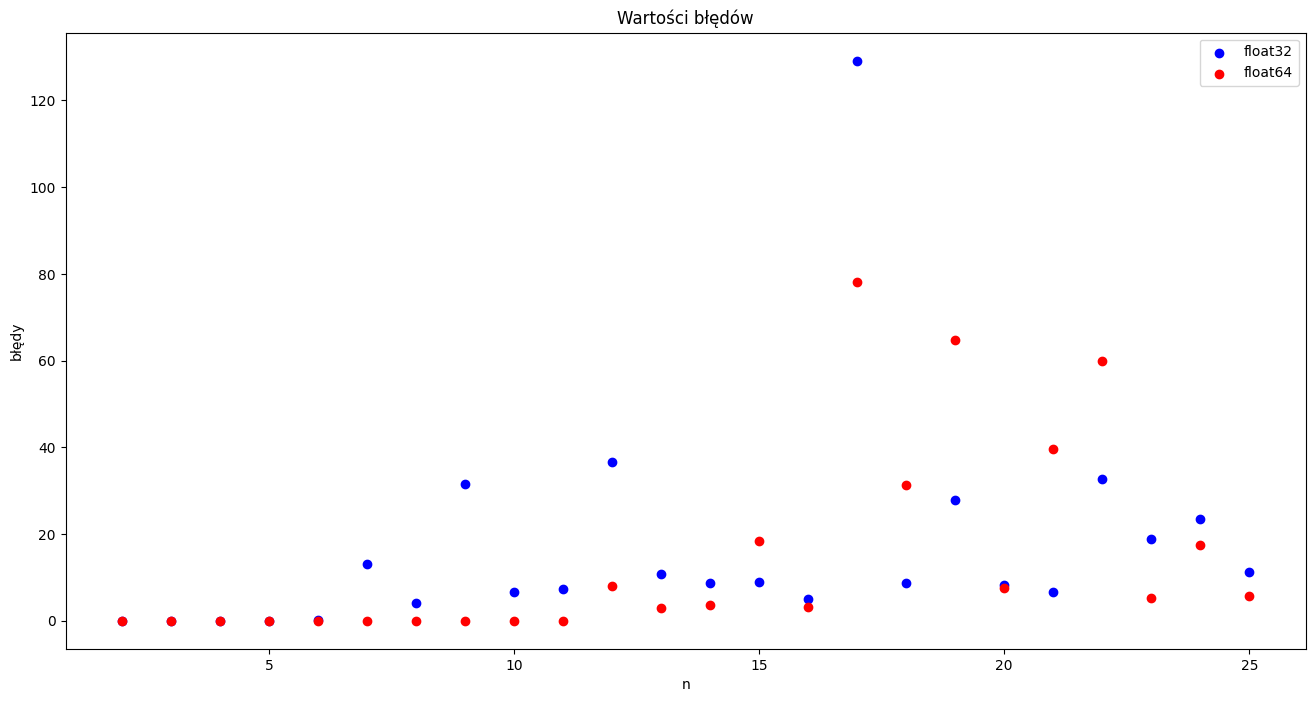

In [10]:
plot_res(results, "error", "Wartości błędów", "błędy")

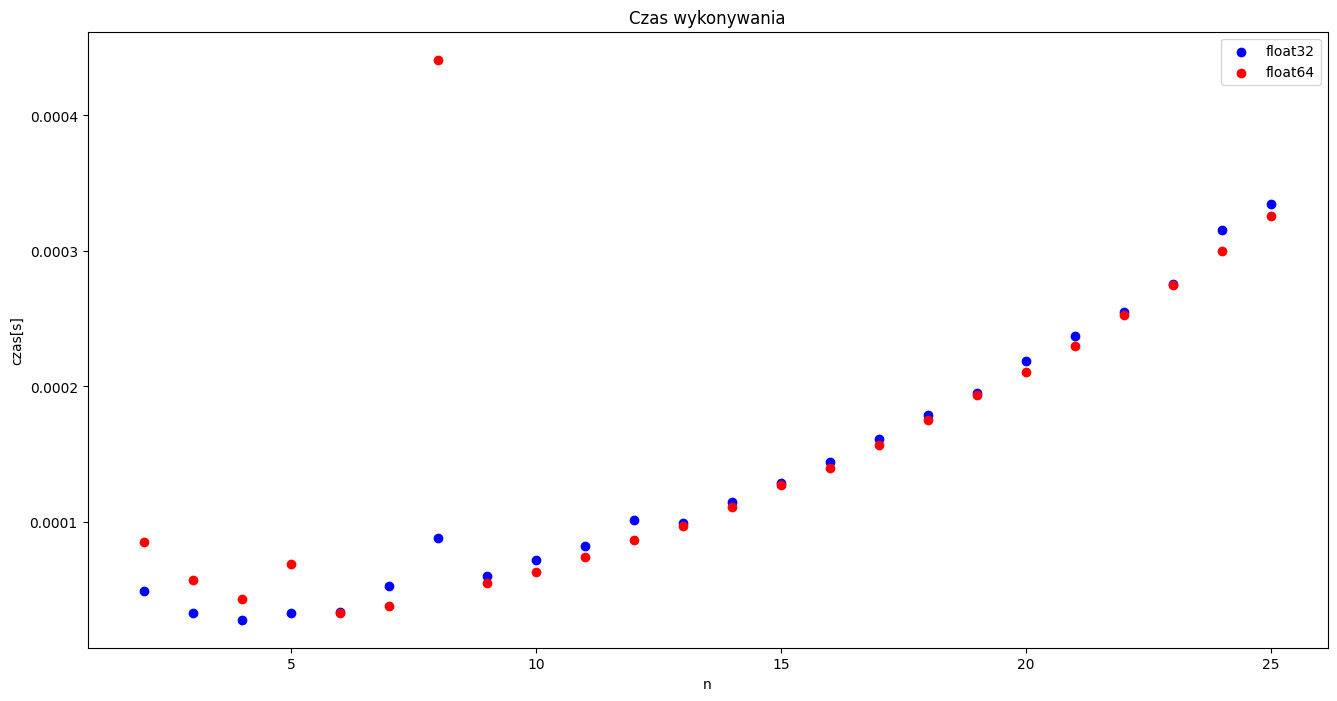

In [11]:
plot_res(results, "time", "Czas wykonywania", "czas[s]")

In [12]:
def f2(i, j):
    return f2(j,i) if j < i else 2*i/j

In [13]:
n = range(2, 300)
precs = {
    "float32": np.float32,
    "float64": np.float64,
}
start_time = time.time()
results2 = solver(f2, n, precs)
end_time = time.time()
print("Czas wykonania create_matrix_A:", end_time - start_time, "sekund")

Czas wykonania create_matrix_A: 18.62479305267334 sekund


In [14]:
df2 = pd.DataFrame(zip(results2["float32"]["error"].values(), results2["float64"]["error"].values()), columns=["float32", "float64"], index=list(n))
p1 = df2.iloc[:23]
p2 = df2.iloc[23::25]
r2 = pd.concat([p1, p2])
r2.to_csv("results2.csv")
r2

,float32,float64
2,0.000000e+00,0.000000e+00
3,2.384186e-07,0.000000e+00
4,1.192093e-07,2.220446e-16
5,2.384186e-07,4.440892e-16
6,3.576279e-07,4.440892e-16
7,1.132488e-06,1.665335e-15
8,4.768372e-07,2.886580e-15
9,2.980232e-06,4.107825e-15
10,2.861023e-06,4.884981e-15
11,1.132488e-06,5.107026e-15


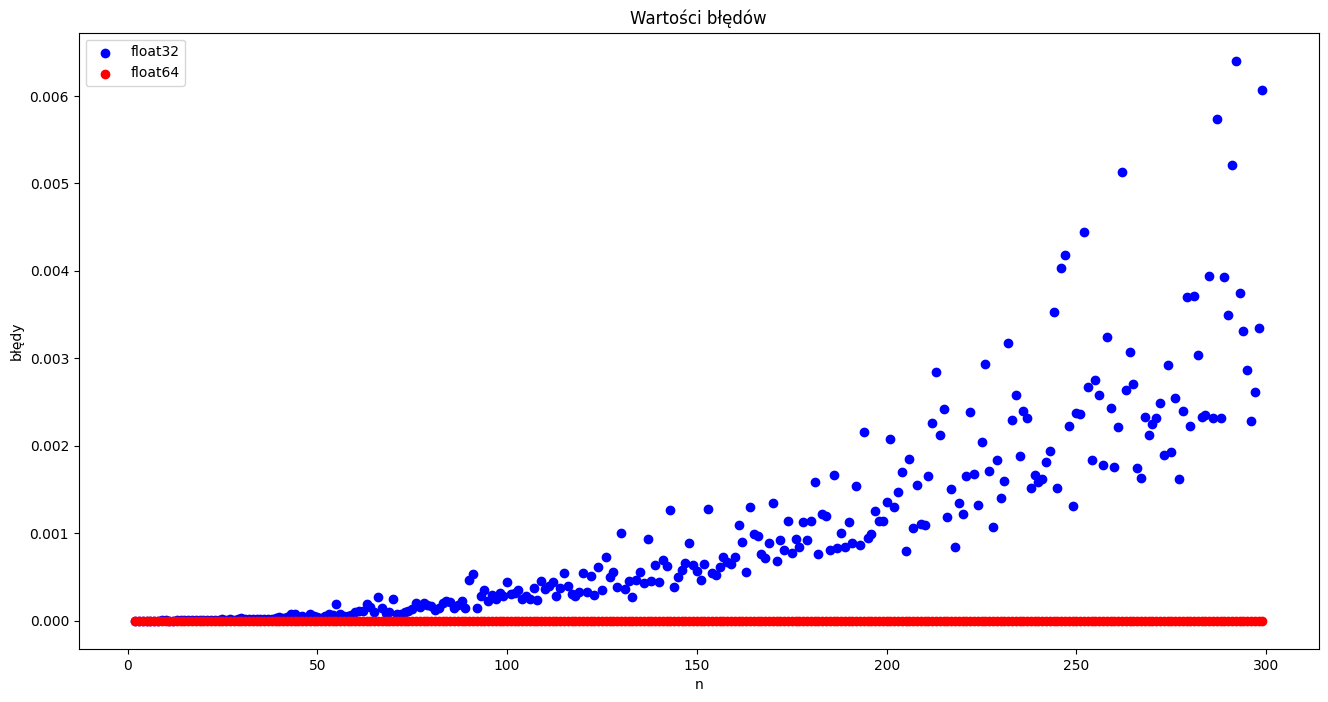

In [15]:
plot_res(results2, "error", "Wartości błędów", "błędy")

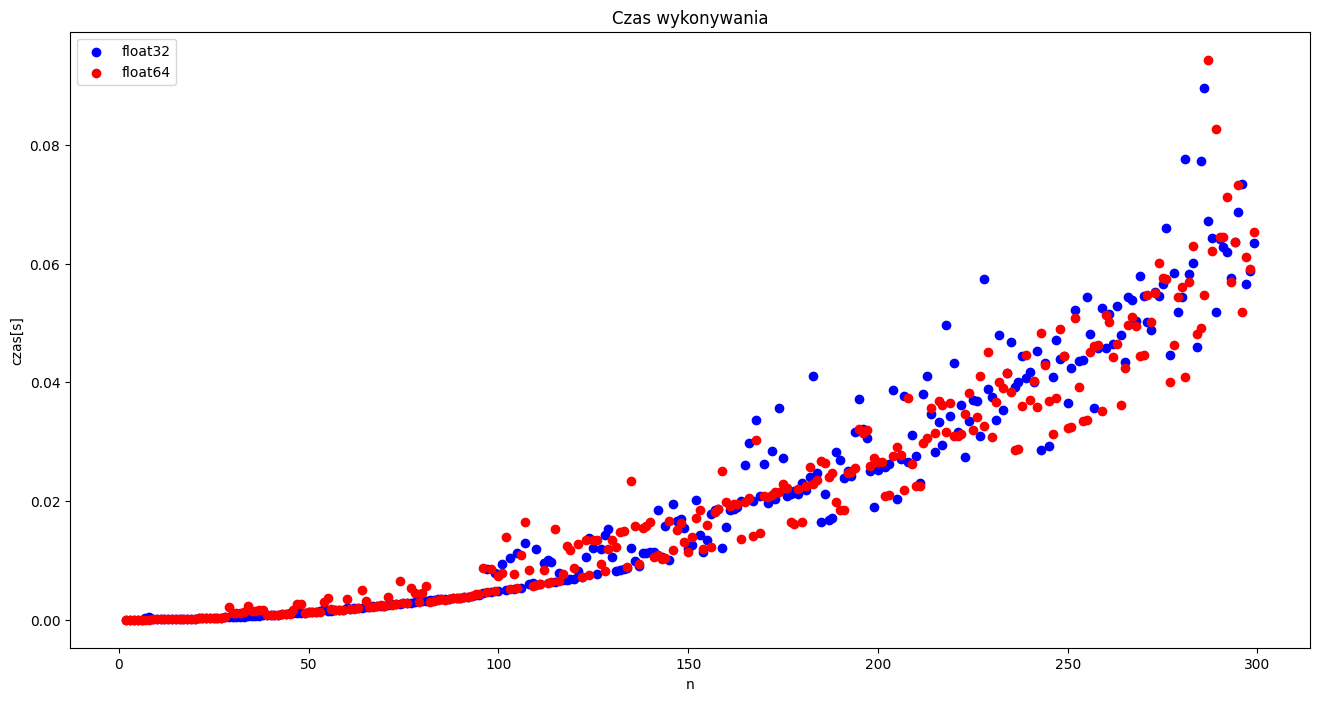

In [16]:
plot_res(results2, "time", "Czas wykonywania", "czas[s]")

In [17]:
from numpy.linalg import cond

def cond_factor(A):
    return cond(A)

In [18]:
runge = range(2, 200)

cond_factor1 = [cond_factor(create_matrix_A(f1, n)) for n in runge]
cond_factor2 = [cond_factor(create_matrix_A(f2, n)) for n in runge]

cond_df = pd.DataFrame(zip(cond_factor1, cond_factor2), columns=["Funkcja 1", "Funkcja 2"], index=list(runge))

In [35]:
cond_df.iloc[10::10].round(2).to_csv("uwarunkowanie.csv")

In [20]:
def plot_cond(df, title, scale=None):
    fig, ax = plt.subplots(figsize=(16,8))
    if scale: ax.set_yscale(scale)
    plt.scatter(x=df.index.tolist(), y=df["Funkcja 1"], c="blue", label="Funkcja 1")
    plt.scatter(x=df.index.tolist(), y=df["Funkcja 2"], c="red", label="Funkcja 2")
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("współczynnik uwarunkowania")
    plt.legend()
    plt.show()

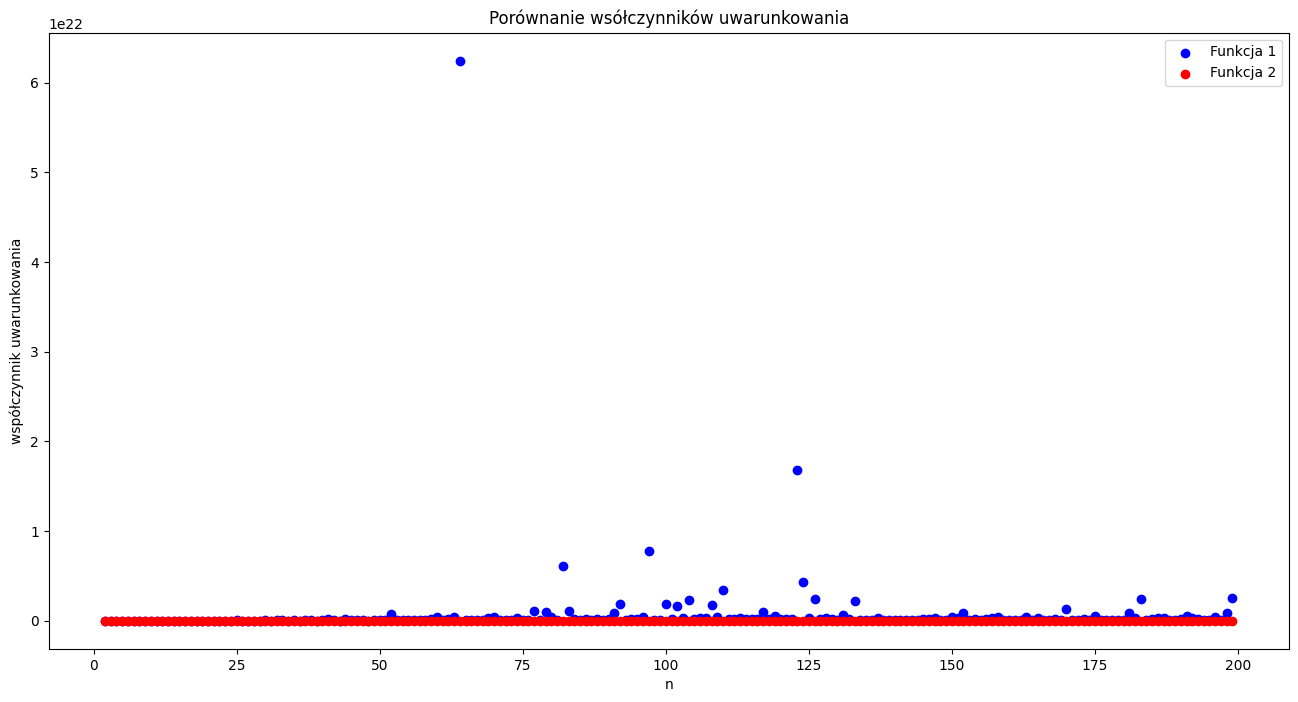

In [21]:
plot_cond(cond_df, "Porównanie wsółczynników uwarunkowania")

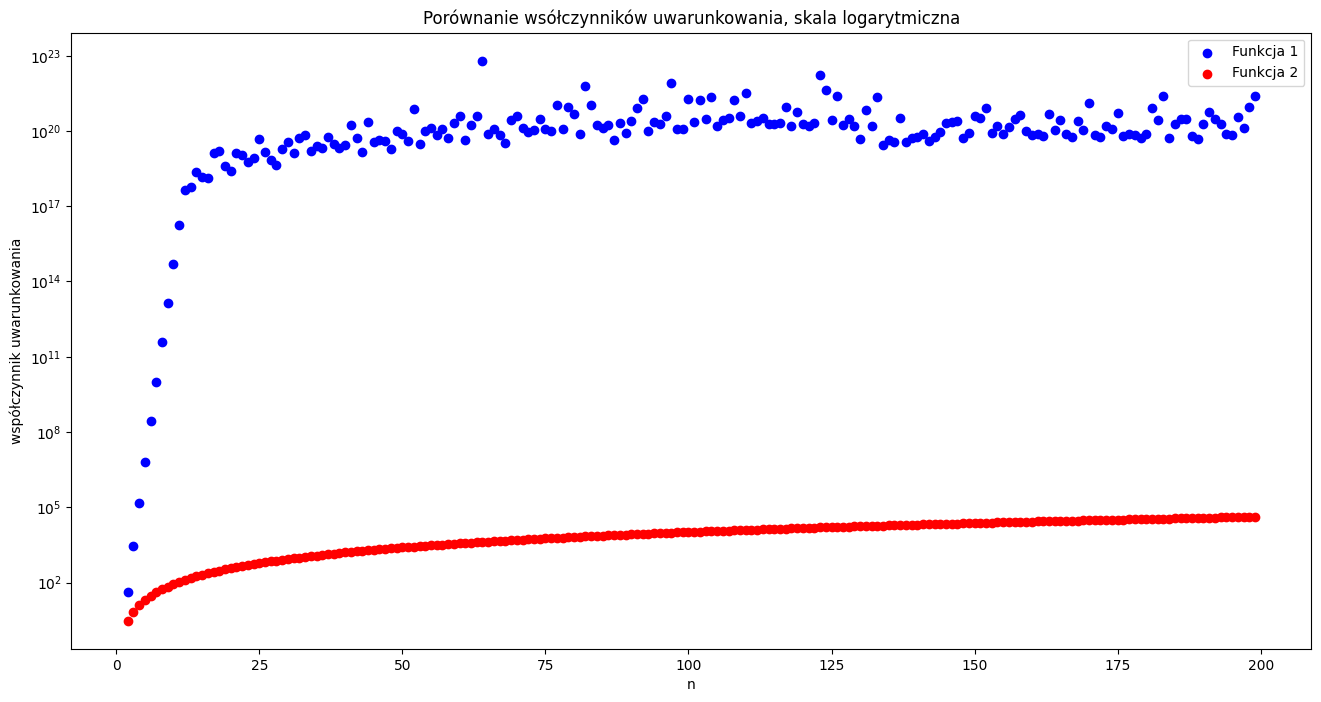

In [22]:
plot_cond(cond_df, "Porównanie wsółczynników uwarunkowania, skala logarytmiczna", "log")

In [23]:
k = 6
m = 3

def f3(i, j):
    if i == j: 
        return k
    if i+1 == j: 
        return 1/(i+m)
    if i-1 == j:
        return k/(1+m+1)
    return 0

In [24]:
n = range(2, 300)
precs = {
    "float32": np.float32,
    "float64": np.float64,
}
start_time = time.time()
results3 = solver(f3, n, precs)
end_time = time.time()
print("Czas wykonania create_matrix_A:", end_time - start_time, "sekund")

Czas wykonania create_matrix_A: 18.480390071868896 sekund


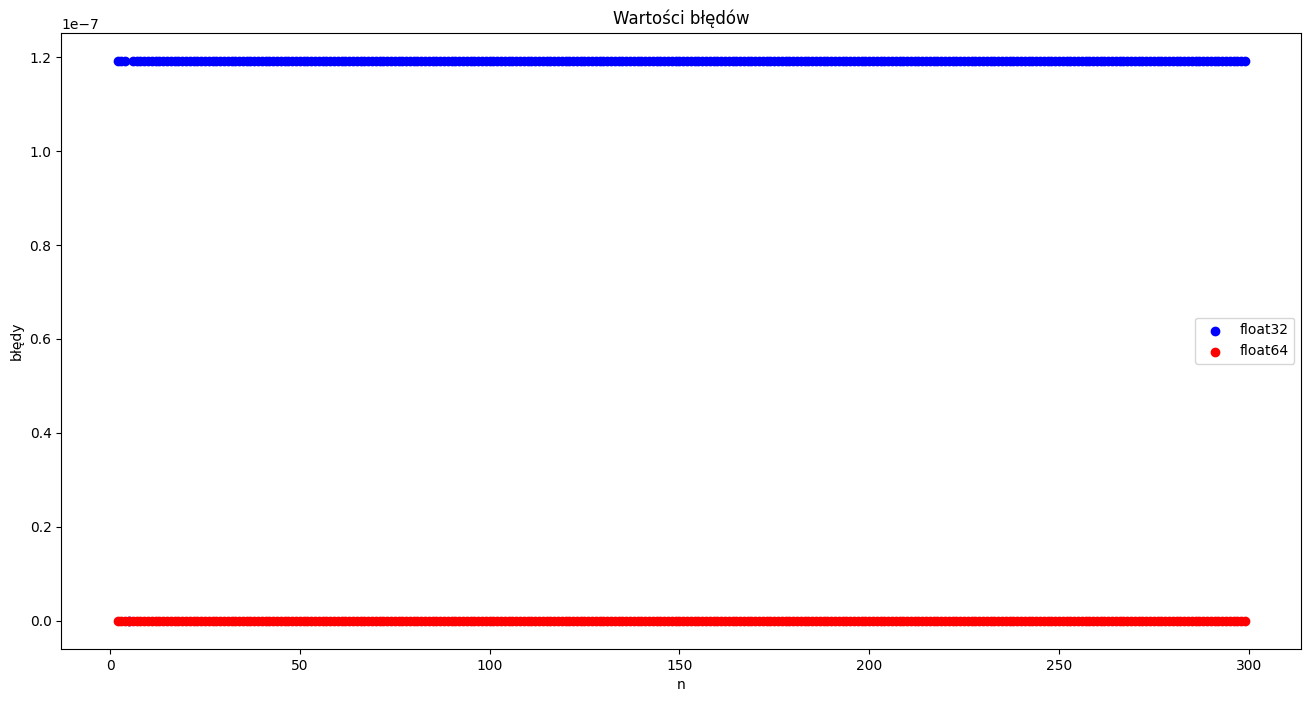

In [25]:
plot_res(results3, "error", "Wartości błędów", "błędy")

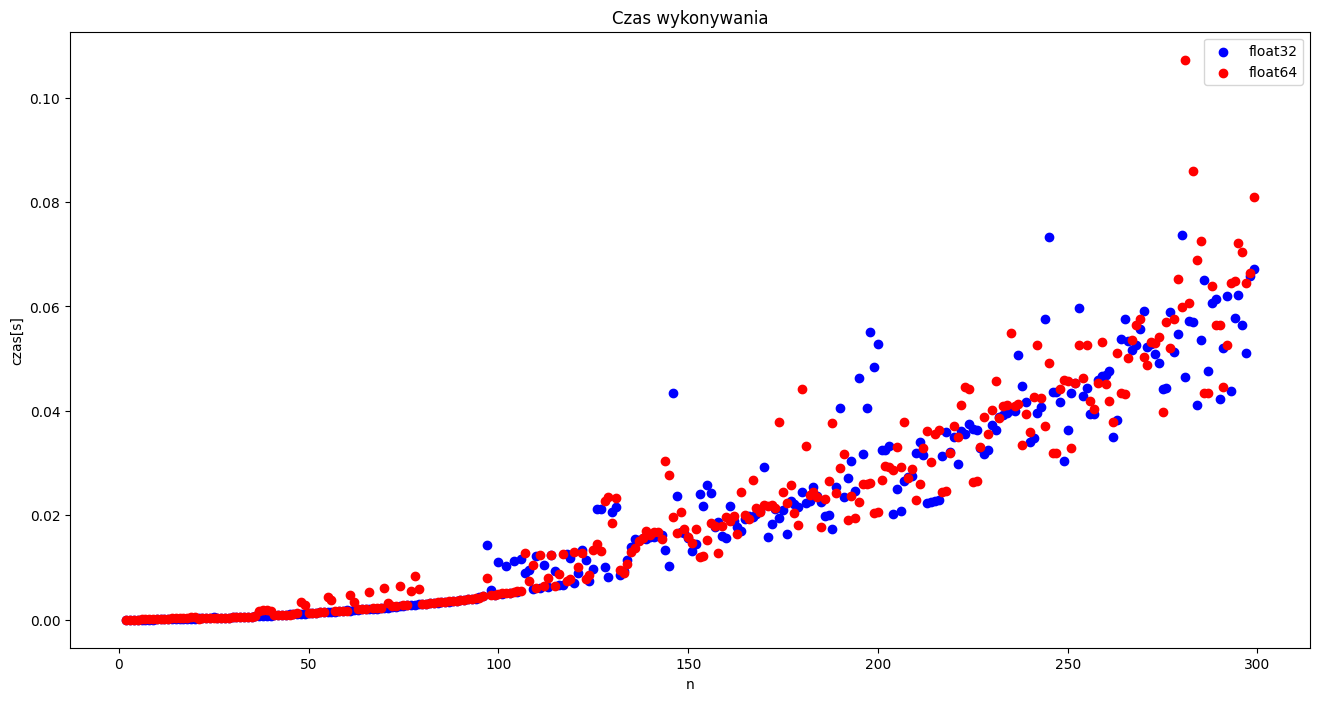

In [26]:
plot_res(results3, "time", "Czas wykonywania", "czas[s]")

In [27]:
def thomas_method(A, b, num_type=np.float64):
    n = len(b)
    C = np.zeros(n, dtype=num_type)
    d = np.zeros(n, dtype=num_type)
    x = np.zeros(n, dtype=num_type)

    # Forward elimination
    C[0] = A[0, 1]
    d[0] = b[0] / C[0]

    for i in range(1, n):
        factor = A[i, 0] / C[i-1]
        C[i] = A[i, 1] - factor * A[i-1, 2]
        d[i] = (b[i] - factor * b[i-1]) / C[i]

    # Backward substitution
    x[-1] = d[-1]
    for i in range(n-2, -1, -1):
        x[i] = d[i] - (A[i, 2] / C[i]) * x[i + 1]

    return x

In [28]:
n = 8
A = create_matrix_A(f3, n)
x  = create_vector_b(n)
b = A @ x
A_col = create_matrix_Thomas(f3, n)
x_res = thomas_method(A_col ,b)
x_res

array([ 0.99994392, -0.99865417,  0.95996157, -0.9599032 ,  0.95987136,
        1.04014776,  0.95952431,  0.95896675])

In [29]:
n = range(2, 300)
precs = {
    "float32": np.float32,
    "float64": np.float64,
}
start_time = time.time()
results_thomas = solver(f3, n, precs, create_matrix=create_matrix_Thomas, solve_method=thomas_method)
end_time = time.time()
print("Czas wykonania create_matrix_A:", end_time - start_time, "sekund")

Czas wykonania create_matrix_A: 3.0175390243530273 sekund


In [37]:
vals = zip(results3["float32"]["error"].values(), results3["float64"]["error"].values(), results_thomas["float32"]["error"].values(), results_thomas["float64"]["error"].values())
cols = ["float32 Gauss", "float64 Gauss", "float32 Thomas", "float64 Thomas"]
df3 = pd.DataFrame(vals, columns=cols, index=list(n))
p1 = df3.iloc[:23]
p2 = df3.iloc[23::25]
r3= pd.concat([p1, p2])
r3.to_csv("results3.csv")
r3

,float32 Gauss,float64 Gauss,float32 Thomas,float64 Thomas
2,1.192093e-07,1.110223e-16,5.960464e-08,0.000000
3,1.192093e-07,0.000000e+00,4.230118e-02,0.042301
4,1.192093e-07,2.220446e-16,4.185849e-02,0.041858
5,0.000000e+00,1.110223e-16,4.154885e-02,0.041549
6,1.192093e-07,1.110223e-16,4.132783e-02,0.041157
7,1.192093e-07,2.220446e-16,4.117942e-02,0.040897
8,1.192093e-07,2.220446e-16,4.103321e-02,0.041158
9,1.192093e-07,2.220446e-16,4.115742e-02,0.040930
10,1.192093e-07,2.220446e-16,4.089737e-02,0.040898
11,1.192093e-07,2.220446e-16,4.077542e-02,0.041158


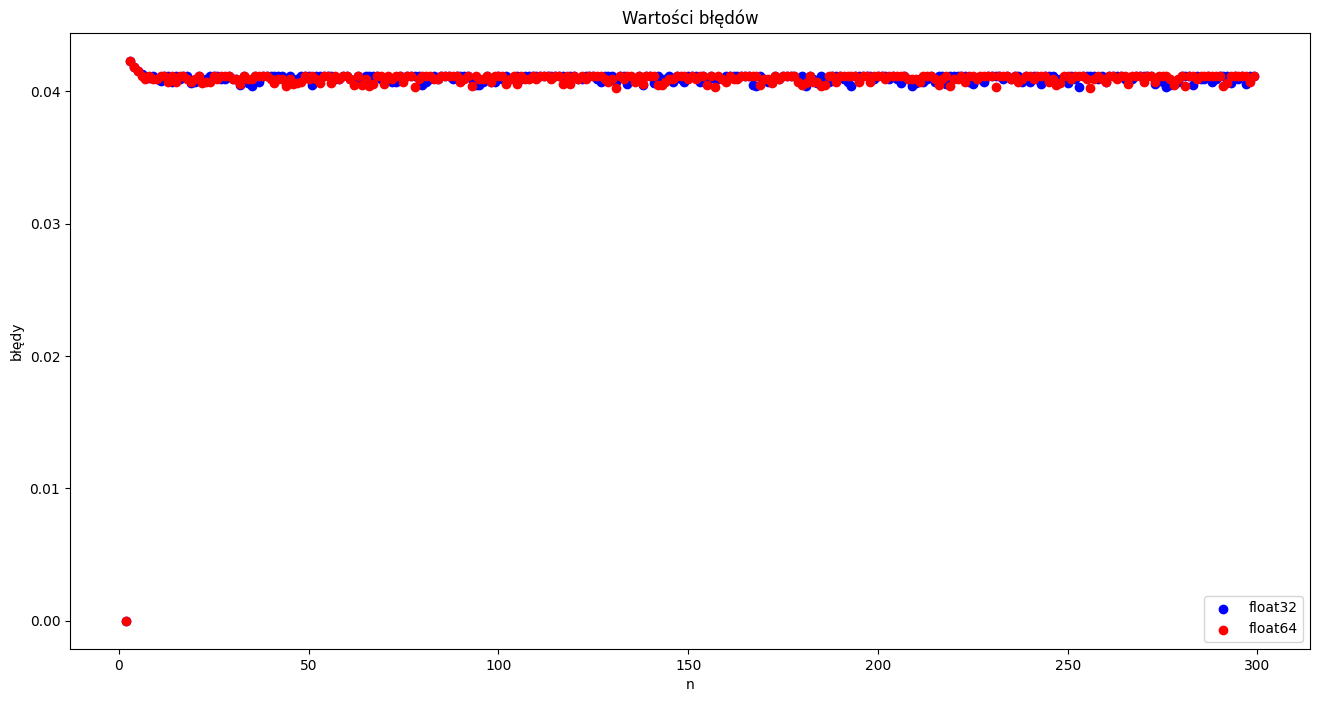

In [31]:
plot_res(results_thomas, "error", "Wartości błędów", "błędy")

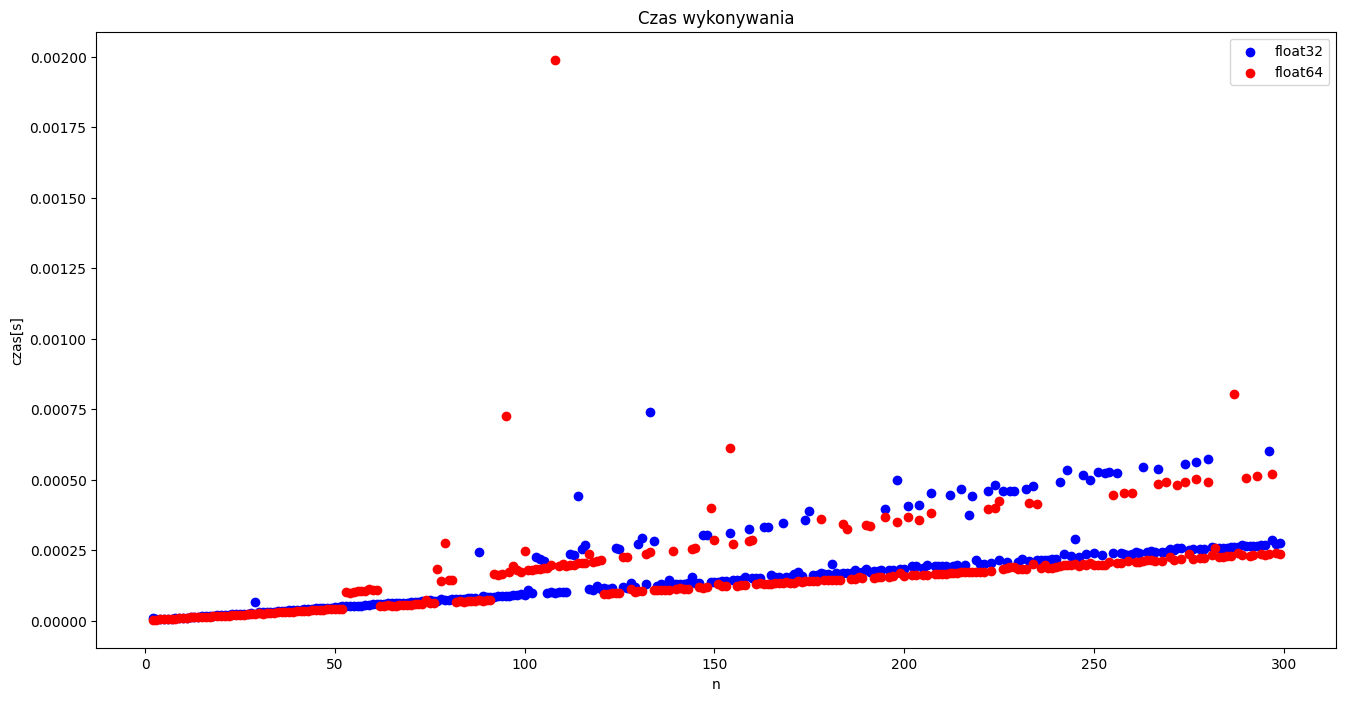

In [32]:
plot_res(results_thomas, "time", "Czas wykonywania", "czas[s]")

In [33]:
def plot_res_tg(rg, rt, attr, label, ylabel, scale=None, n=None):
    err32_g = rg["float32"][attr]
    err64_g = rg["float64"][attr]
    err32_t = rt["float32"][attr]
    err64_t = rt["float64"][attr]
    if n is not None:
        err32_g = {i: err32_g[i] for i in n}
        err64_g = {i: err64_g[i] for i in n}
        err32_t = {i: err32_t[i] for i in n}
        err64_t = {i: err64_t[i] for i in n}

    fig, ax = plt.subplots(figsize=(16, 8))
    if scale: ax.set_yscale(scale)
    plt.scatter(x=err32_g.keys(), y=err32_g.values(), c="blue", label="gauss float32")
    plt.scatter(x=err64_g.keys(), y=err64_g.values(), c="red", label="gauss float64")
    plt.scatter(x=err32_t.keys(), y=err32_t.values(), c="green", label="thomas float32")
    plt.scatter(x=err64_t.keys(), y=err64_t.values(), c="yellow", label="thomas float64")
    plt.title(label)
    plt.xlabel('n')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

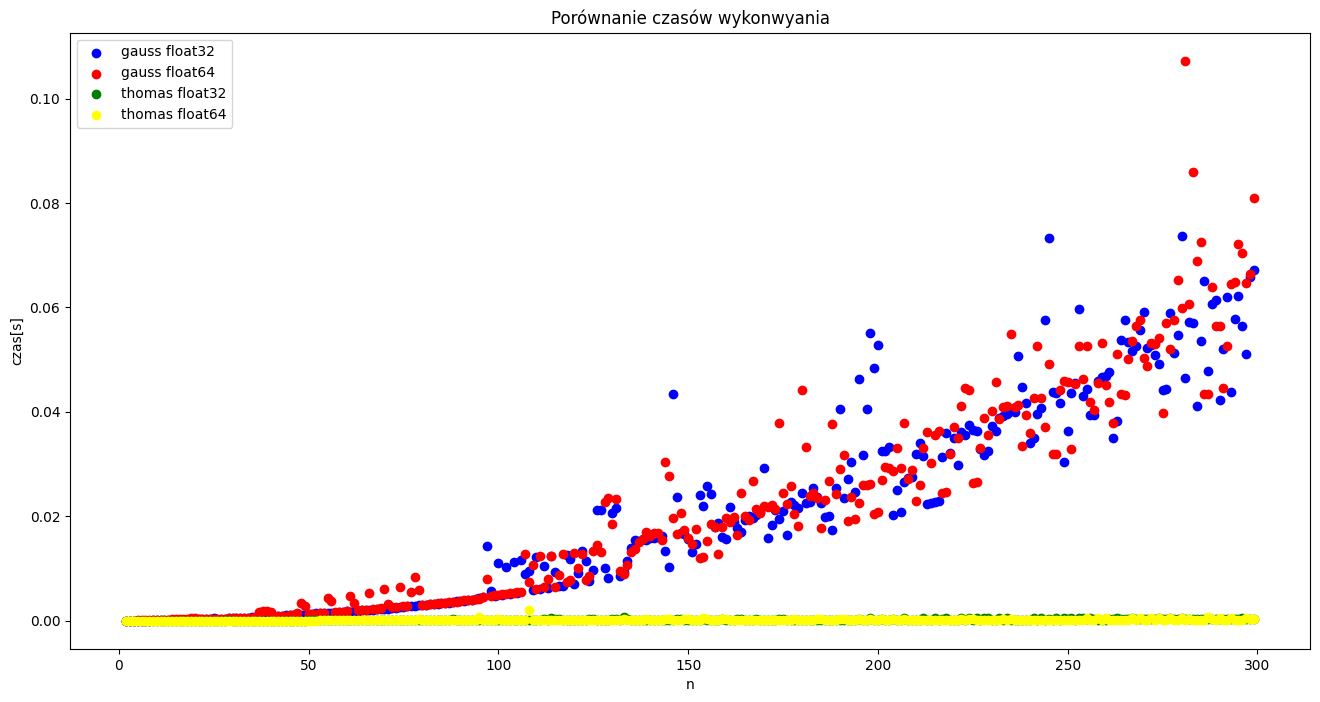

In [34]:
plot_res_tg(results3, results_thomas, "time", "Porównanie czasów wykonwyania", "czas[s]")